<a href="https://colab.research.google.com/github/Biel-PS/AdvancedFluidMechanics/blob/BielPS/3-Turbulence/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 : Computation of length scales and spectrum in space

We have fluctuations of velocity in time, but not in space. In order to get fluctuations of velocity in space (for a given time $t_0$) we should have an array of anemometers very close to each other (microns, probably), which is quite difficult (it is much more easier for CFD results).

Fortunately, there is the [Taylor hypothesis](https://www-sciencedirect-com.recursos.biblioteca.upc.edu/science/article/pii/B9780080443508500014#p15) (see also Pope's book reference at the beginning of the chapter, p. 223), which says that if turbulence can be considered (average) steady and fluctuations are much smaller than average velocity, time can be replaced by $x/\overline{u}$. The we can estimate the lenght scales of turbulence by replacing $t$ by $x$ and frequency $f$ by wavenumber $k$ (do not confuse with turbulent kinetic energy).

In this assignment it is proposed to to make all the previous analysis and find, in space:

- Kolmogorov's scale
- Autocorrelation function
- Integral scale
- Power spectrum (in $k$) and check the Kolmogorov's power law.

Do not do that for $y = 0 \,\text{mm}$. Choose another $y$ !

In [229]:
import pandas as pd
import numpy as np

columns = []


In [230]:
for i in range(17):
    y = (i-8)*5
    columns.append("y = "+str(y)+"mm")

In [231]:
turbulenceData = pd.read_csv('TurbVel.csv', delimiter=',', index_col=0, names=columns)
turbulenceData.index.name = "length"

In [232]:
statData = turbulenceData.describe()
display (statData)
mean_velocities = statData.loc["mean"]


,y = -40mm,y = -35mm,y = -30mm,y = -25mm,y = -20mm,y = -15mm,y = -10mm,y = -5mm,y = 0mm,y = 5mm,y = 10mm,y = 15mm,y = 20mm,y = 25mm,y = 30mm,y = 35mm,y = 40mm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.104367,21.044473,20.757320,20.316435,20.247308,20.270573,19.733937,19.493431,17.798975,17.059820,19.138614,19.377307,19.330135,19.228752,19.026175,19.121565,18.570242
std,0.187226,0.228523,0.762061,0.776583,0.536762,0.262442,0.251107,0.491538,1.124547,0.988907,0.305786,0.354726,0.462051,0.478166,0.694788,0.662401,0.860208
min,20.468907,20.207287,18.634798,18.866662,19.123603,19.704760,19.168608,18.297226,12.824605,13.765816,17.234927,17.764286,17.245155,17.265657,16.373577,16.511184,16.101291
25%,20.989390,20.989390,20.322845,19.751012,19.797365,20.065853,19.566596,19.075895,17.327294,16.491465,18.977981,19.213710,19.109572,18.989162,18.678760,18.722815,17.983749
50%,21.099841,21.112168,20.733695,20.225018,20.272393,20.219094,19.704760,19.532177,18.071674,17.173579,19.168608,19.440708,19.338256,19.258909,19.045057,19.258909,18.689782
75%,21.173826,21.186155,21.062977,20.624988,20.676252,20.492846,19.913683,19.937022,18.569031,17.774791,19.315560,19.601036,19.658606,19.520739,19.477807,19.601036,19.227838
max,21.647802,21.447038,23.727658,23.157105,21.774209,20.842895,20.361487,20.661140,19.843817,19.727874,20.077620,20.230943,20.721574,20.444995,20.830752,20.337691,20.492846


In [233]:
y_position = "y = 10mm"

In [234]:
turbulenceData.index = turbulenceData.index * mean_velocities.loc[y_position]
turbulenceData.to_hdf("TurbVel.hdf", key='data', mode='w')

<Axes: xlabel='length', ylabel='u'>

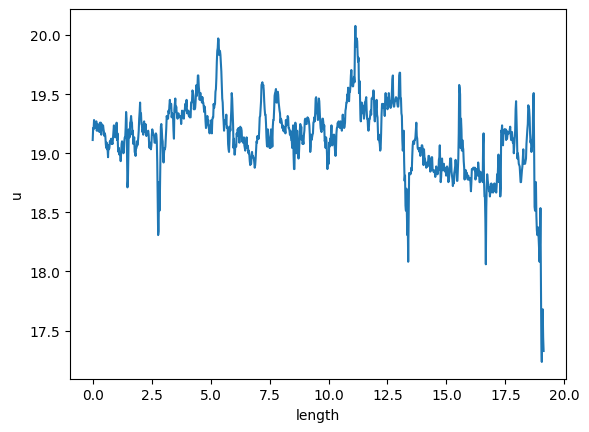

In [235]:
turbulenceData[y_position].plot(ylabel="u")

In [236]:
display(turbulenceData)

,y = -40mm,y = -35mm,y = -30mm,y = -25mm,y = -20mm,y = -15mm,y = -10mm,y = -5mm,y = 0mm,y = 5mm,y = 10mm,y = 15mm,y = 20mm,y = 25mm,y = 30mm,y = 35mm,y = 40mm
length,,,,,,,,,,,,,,,,,
0.000000,20.916005,21.013892,19.890369,20.564816,19.247617,20.242762,20.171834,19.326923,17.711748,17.954515,19.112384,19.247617,18.955669,19.624038,18.989162,20.337691,17.901476
0.019139,20.757920,21.124463,19.878740,20.528820,19.258909,20.278330,20.124676,19.417902,16.314876,17.534186,19.213710,19.292888,18.922264,19.704760,18.833365,20.313920,17.743229
0.038277,20.661140,21.087559,20.101135,20.492846,19.213710,20.337691,20.136438,19.360977,13.902128,18.590930,19.202443,19.349631,18.933382,19.716296,18.601871,20.254624,17.922668
0.057416,20.794288,21.099841,20.207287,20.421109,19.315560,20.219094,20.124676,19.349631,12.840679,18.340470,19.281544,19.372364,18.955669,19.785785,18.503472,20.278330,17.471901
0.076554,20.952667,21.099841,20.349604,20.480892,19.292888,20.313920,20.148242,19.326923,15.086783,18.243283,19.247617,19.349631,18.944540,19.785785,17.838033,20.195451,18.135857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.042921,21.087559,21.248015,19.349631,20.007225,19.785785,19.832212,19.612552,18.844470,17.010890,18.877784,17.234927,19.937022,20.373413,18.800155,17.451182,18.922264,19.808986
19.062060,21.013892,21.334855,19.474945,19.972095,19.774176,19.855463,19.601036,18.844470,16.960352,18.082340,17.513403,20.183621,20.148242,18.800155,17.440815,19.532177,20.207287
19.081198,21.050677,21.310005,19.440708,20.054129,19.704760,19.867080,19.578058,18.888878,16.373577,18.623839,17.680285,19.960385,20.148242,18.329634,17.461523,19.797365,20.160017


In [237]:
display(statData.loc["mean"])

,mean
y = -40mm,21.104367
y = -35mm,21.044473
y = -30mm,20.757320
y = -25mm,20.316435
y = -20mm,20.247308
y = -15mm,20.270573
y = -10mm,19.733937
y = -5mm,19.493431
y = 0mm,17.798975
y = 5mm,17.059820


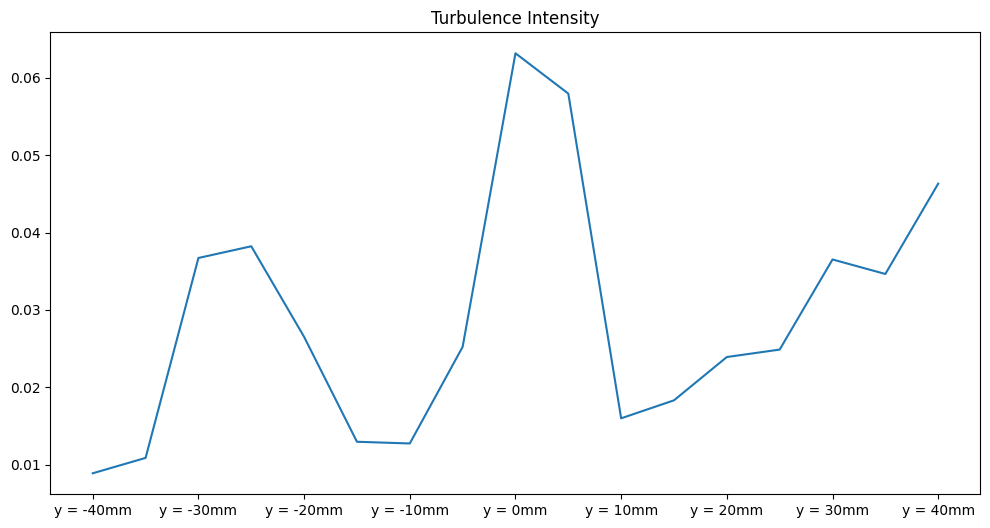

In [238]:
turbIntensity = statData.loc["std"]/statData.loc["mean"]
turbIntensity.plot(title="Turbulence Intensity",figsize=(12, 6))
turbVelFluct = turbulenceData-statData.loc["mean"]

In [239]:
TKE_lenSca = 1.5*(statData.loc["std"])**2
# TKE_lenSca.plot(figsize=(12, 6))

In [240]:
k = TKE_lenSca.loc[y_position]
display(k)

np.float64(0.14025745070699652)

In [241]:
nu = 1.5e-5 # m^2/s
c = 0.265 # m
Re_t = np.sqrt(k)*c/nu
print('Re_t = {:.5g}'.format(Re_t))

Re_t = 6616.3


In [242]:
epsilon = k**1.5/c
display(epsilon) # m^2/s^3

np.float64(0.1982179761285821)

In [243]:
lengthScale = (nu**3/epsilon)**(1/4)
display("Length scale = " + str(lengthScale))

'Length scale = 0.00036122906326551844'

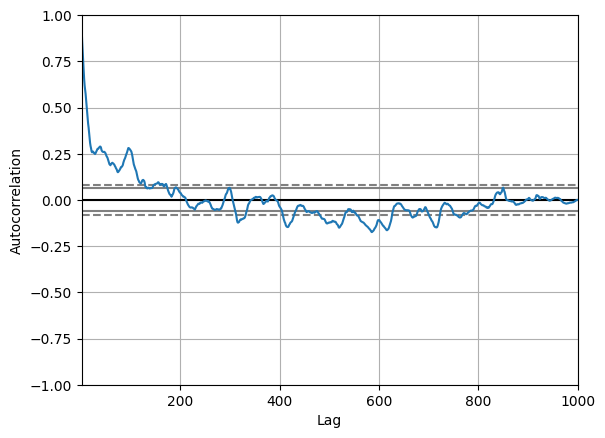

In [244]:
uPrime = turbVelFluct[y_position].values
autocorr = pd.plotting.autocorrelation_plot(uPrime).get_lines()[5].get_xydata()

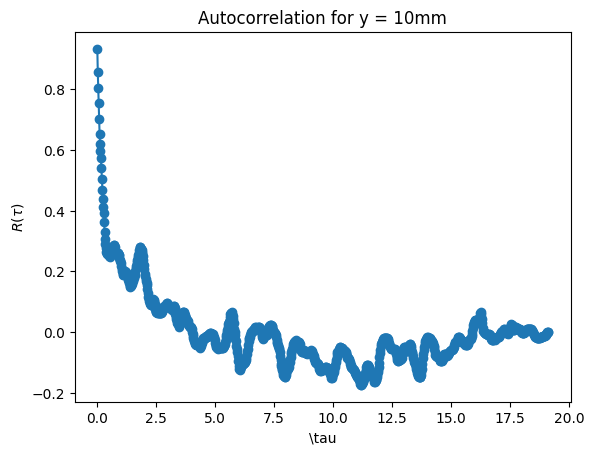

In [245]:
autocorr[:,0]=turbVelFluct.index.values
import matplotlib.pyplot as plt
plt.plot(autocorr[:,0],autocorr[:,1],'o-')
ax = plt.gca()
ax.set_ylabel(r"$R(\tau)$")
ax.set_xlabel(r"\tau")
ax.set_title("Autocorrelation for "+ y_position);

In [246]:
import statsmodels.api as sm
rho = sm.tsa.acf(uPrime,nlags=200,fft=False)

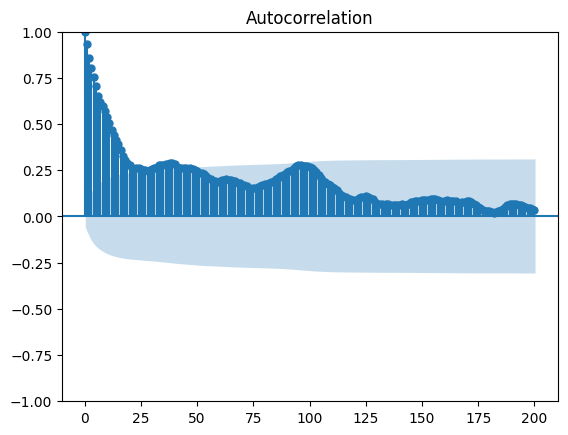

In [247]:
from scipy import integrate
fig = smg.tsa.plot_acf(uPrime, lags=200, fft=False)

In [248]:
T = integrate.trapezoid(rho[0:200],autocorr[0:200,0])
display ("Integration = " + str(T))

'Integration = 0.7325547596884703'

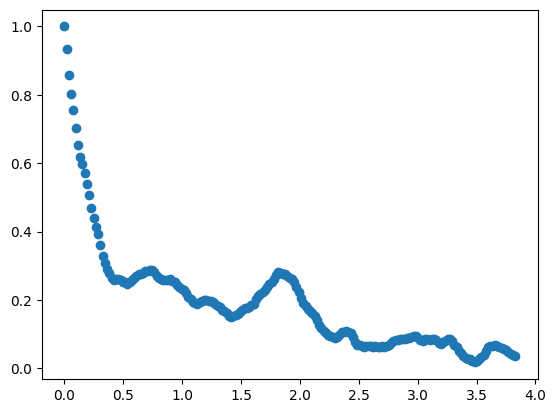

In [249]:
import matplotlib.pyplot as plt
xVal = turbVelFluct.index.values
plt.scatter(xVal[0:201],rho)

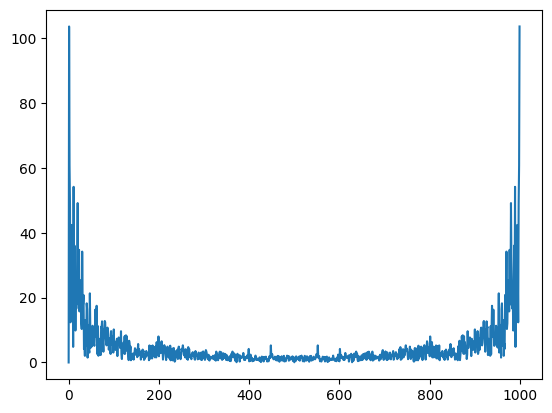

In [250]:
E = np.abs(np.fft.fft(uPrime))
plt.plot(E);

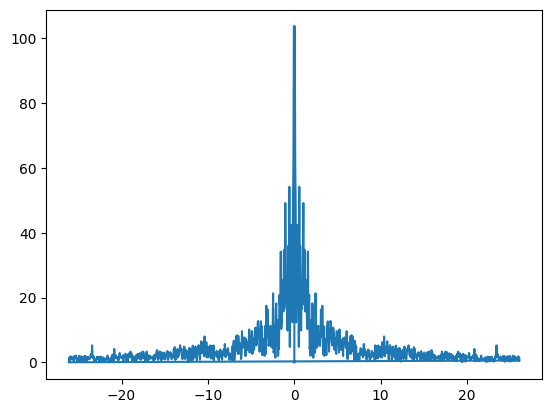

In [251]:
Wave = np.fft.fftfreq(uPrime.size,turbVelFluct.index.values[1])
plt.plot(Wave,E);

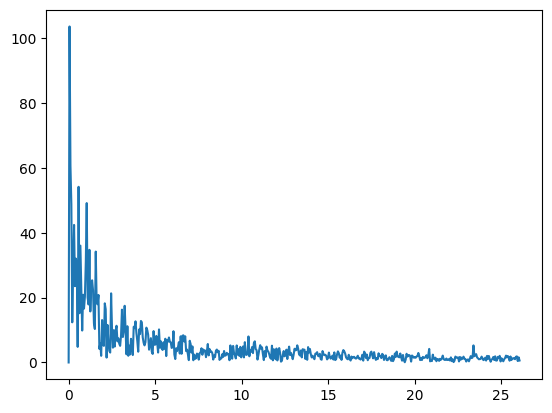

In [252]:
Wave = Wave[:len(E)//2]
E = E[:len(E)//2]

plt.plot(Wave,E);

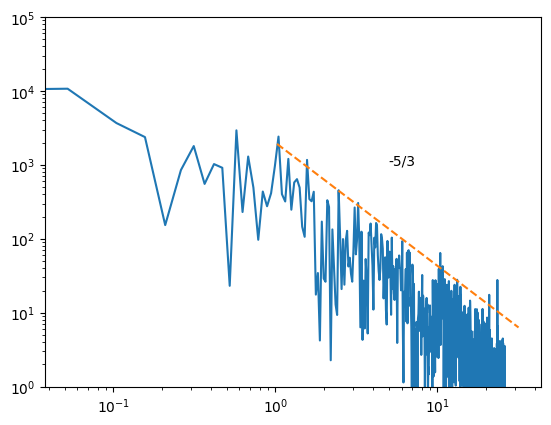

In [256]:
P = E**2
fig, ax = plt.subplots(1)
ax.set_ylim(1,1e5)
ax.loglog(Wave,P)
k_plot = np.logspace(0.01,1.5,100)
k_ref = 1
P_ref = 2e3
P_plot = P_ref/k_ref**(-5/3)*k_plot**(-5/3)
ax.loglog(k_plot,P_plot,'--')
ax.text(5,1000,'-5/3');